In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import scipy

import macg

In [2]:
def isEven(n):
    """
    Function which will "return True" if n is even, False otherwise.
    Uses the modulo operator: n%m is 0 if n is divisible by m, and 1 if n
    is not divisible by m. So n%3==0 evaluates to True if n is divisible by
    three.
    """
    return n%2==0

def isPrime(n):
    """
    Function which returns True if the integer n is prime. Tests integers
    d from two up to Dmax = scipy.sqrt(n), stopping if any are divisors of n
    (or, test if n is even and then test odd divisors). This is most naturally
    done using the "while" command, 
      while n%d != 0 and d <= Dmax:
          d+=1		[or 2]
    What condition will d satisfy after the while loop if n is prime?
    """
    Dmax = scipy.sqrt(n)
    if n == 2:
        return True
    if isEven(n):
        return False
    d = 3
    while n%d != 0 and d <= Dmax:
        d += 2
    return d > Dmax

In [3]:
def angle(p1, p2):
    return np.rad2deg(np.arctan2((p2[1] - p1[1]), (p2[0] - p1[0])))

In [4]:
def slope(p1, p2):
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

In [5]:
def plot_even_lines(row, sp, b):
    q, qp = row.values
    bq = b - abs(q)
    p1x, p1y, p2x, p2y, p3x, p3y = (0, q, q, 0, 0, -q)
    p4x, p4y, p5x, p5y = (-bq, q, bq, q)
    p6x, p6y, p7x, p7y = (q, bq, q, -bq)
    endo_even = abs(qp + 1)
    exo_even = abs(qp - 1)
    qp_is_prime = isPrime(abs(qp))
    if qp_is_prime:
        hv_lines_color = 'g'
        hv_linewidth = 0.5
        bbox_color = 'white'
        bbox_background = 'black'
    else:
        hv_lines_color = 'r'
        hv_linewidth = 5
        bbox_color = 'white'
        bbox_background = 'grey'
    sp.plot([p1x, p2x], [p1y, p2y], 'b')
    sp.plot([p2x, p3x], [p2y, p3y], 'b')
    # horizontal lines
    sp.plot([p4x, p5x], [p4y, p5y], hv_lines_color, alpha=0.3, linewidth=hv_linewidth)
    # vertical lines
    sp.plot([p6x, p7x], [p6y, p7y], hv_lines_color, alpha=0.3, linewidth=hv_linewidth)
    if q:
        sp.text(0, q, abs(qp), ha='center', va='center', color=bbox_color,
                bbox={'facecolor':bbox_background, 'alpha': 0.8, 'pad': 3})
        sp.text(q, 0, abs(qp), ha='center', va='center', color=bbox_color,
                bbox={'facecolor':bbox_background, 'alpha': 0.8, 'pad': 3})
        sp.text((p2x + p1x) / 2, (p2y + p1y) / 2, endo_even, ha='center', va='center', color='black',
                rotation=angle([p1x, p1y], [p2x, p2y]),
                bbox={'facecolor':'orange', 'alpha': 0.8, 'pad': 3})
        sp.text((p3x + p2x) / 2, (p3y + p2y) / 2, exo_even, ha='center', va='center', color='black',
                rotation=angle([p2x, p2y], [p3x, p3y]),
                bbox={'facecolor':'orange', 'alpha': 0.8, 'pad': 3})
    for px in range(-bq, bq + 1):
        sp.plot([0, px], [0, q], 'b', alpha=0.1)
        if qp_is_prime and px != p6x:
            sp.plot(px, q, 'wo', alpha=1)

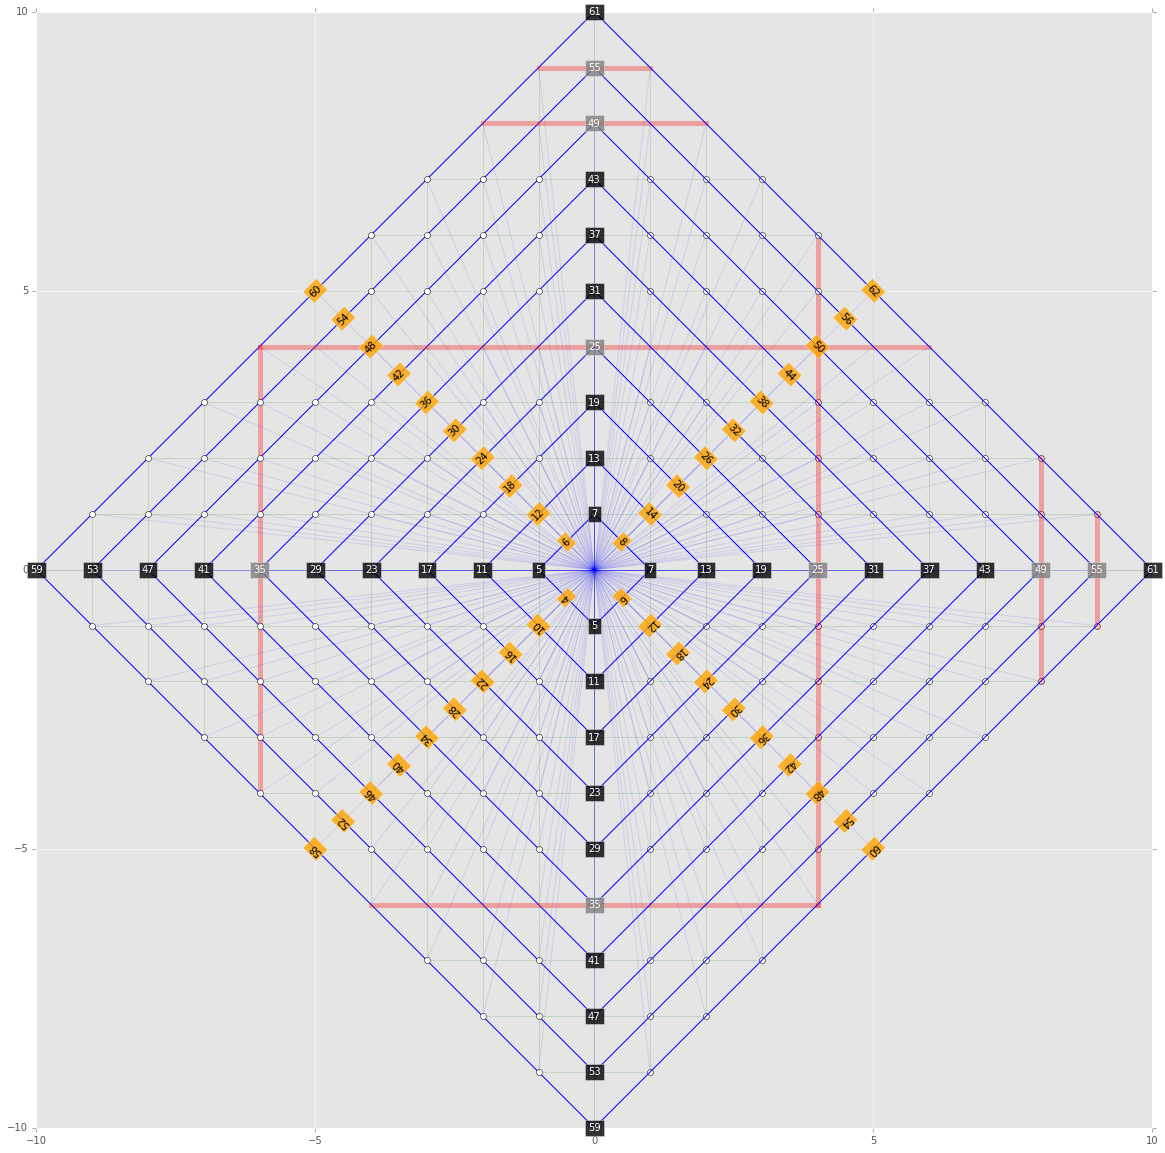

In [6]:
breadth = 10
colours = {True: {True: 'r', False: 'g'}, False: {True: 'b', False: 'y'}}
fig, sp = plt.subplots(1)
fig.set_size_inches(2 * breadth, 2 * breadth)

rg = range(-breadth, breadth + 1)
qs = pd.Series([q for q in rg])
df = pd.DataFrame(qs, columns=['q'])
df['qp'] = df['q'] * 6 + 1
intersections = df.apply(func=plot_even_lines, args=(sp, breadth), axis=1)
fig.savefig('output/fig_{}.svg'.format(breadth))